## Генерация изображений с помощью YandexART

В этом ноутбуке вы сможете генерировать изображения с помощью YandexART. При работе мы предполагаем, что установлены секреты в Datasphere с именами `folder_id` и `api_key`.

In [2]:
import os
folder_id = os.environ['folder_id']
api_key = os.environ['api_key']
print(f"Используем folder_id={folder_id}")

Используем folder_id=b1gbicod0scglhd49qs0


Установим Yandex Cloud ML SDK (не пугайтесь, если это занимает пару минут). Эту ячейку нужно выполнить только один раз в новом проекте Datasphere, после этого её можно пропускать.

In [6]:
%pip install yandex_cloud_ml_sdk

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 68.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 5.29.3 which is incompatible.
google-cloud-bigquery 3.10.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5,

Создадим предварительные объекты для генерации:

In [3]:
from PIL import Image
from io import BytesIO
from yandex_cloud_ml_sdk import YCloudML

sdk = YCloudML(folder_id=folder_id, auth=api_key)
yart_model = sdk.models.image_generation('yandex-art')

def generate(prompt, height_ratio=1, width_ratio=1):
    res = yart_model.configure(
        height_ratio=height_ratio, 
        width_ratio=width_ratio).run_deferred(prompt)
    res = res.wait()
    return Image.open(BytesIO(res.image_bytes))
    

Можно заранее задать параметры соотношения сторон для генерации:

In [4]:
params = {
    "width_ratio" : 16,
    "height_ratio" : 9
}

Генерируем одно изображение (это занимает 5-30 сек):

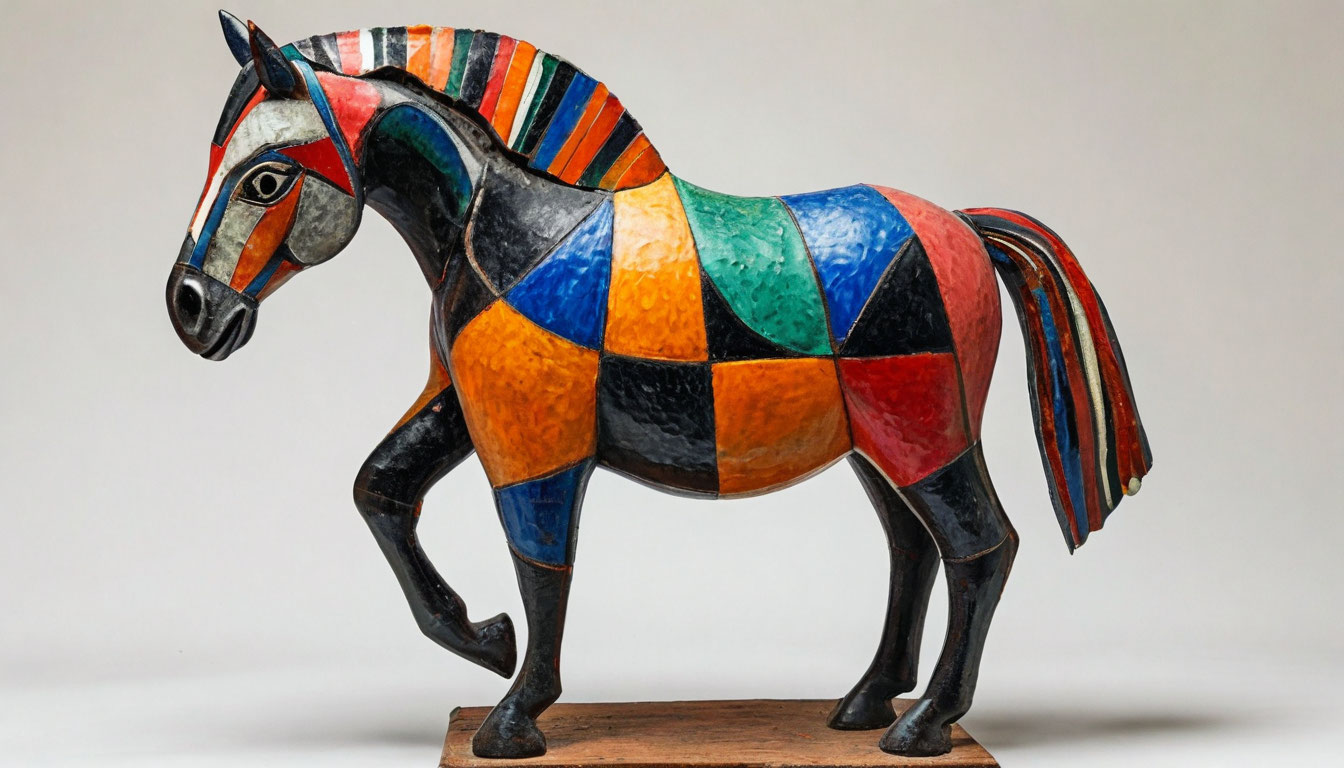

In [25]:
res = generate("сферический конь в стиле Пабло Пикассо",**params)
res

Понравившееся изображения можно записать на диск. Для удобства все созданные изображения будем складывать в директорию `output`:

In [28]:
os.makedirs('output',exist_ok=True)

In [29]:
res.save('output/picasso_horse.jpg')

Генерация серии изображений по набору промптов:

In [4]:
from tqdm.auto import tqdm

colors = ['красный','оранжевый','желтый','зелёный','голубой','синий','фиолетовый']
prompt = "Девушка, у которой цвет волос: "

for c in tqdm(colors):
    res = generate(prompt+c,**params)
    res.save(f"output/волос_{c}.jpg")

100%|██████████| 7/7 [01:16<00:00, 10.90s/it]


А вот как можно сгенерировать картины по промптам, находящимся в файле prompts.txt:

In [5]:
from tqdm.auto import tqdm

with open('prompts.txt',encoding='utf-8') as f:
    prompts = f.readlines()

for p in tqdm(prompts):
    res = generate(p,**params)
    fn = p.replace(':','')
    res.save(f"output/{fn}.jpg")

100%|██████████| 3/3 [00:32<00:00, 10.85s/it]
